<a href="https://colab.research.google.com/github/ArthurDF/OpenCV/blob/main/trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

# **Homomorfico.py**

O programa homomorfico.py tem como objetivo criar uma aplicação do filtro homomorfico para melhorar a iluminação de imagens pouco ilumindas

Isso é feito a partir de uma filtragem no dominio da frequência se utilizando da transformada discreta de fourrier da imagem e um produto da função de transferência do 

Primeiro definimos os parametros do filtro e adeuqamos a imagem para a operação da transformada

In [6]:
im=cv.imread("ex.jpg",cv.IMREAD_GRAYSCALE)
X,Y = im.shape

dft_M = cv.getOptimalDFTSize(X)
dft_N = cv.getOptimalDFTSize(Y)

padded=cv.copyMakeBorder(im,0,X-dft_M,0,Y-dft_N,cv.BORDER_CONSTANT,None,0)

Visualizamos a nossa imagem pronta para a aplicação da transformada

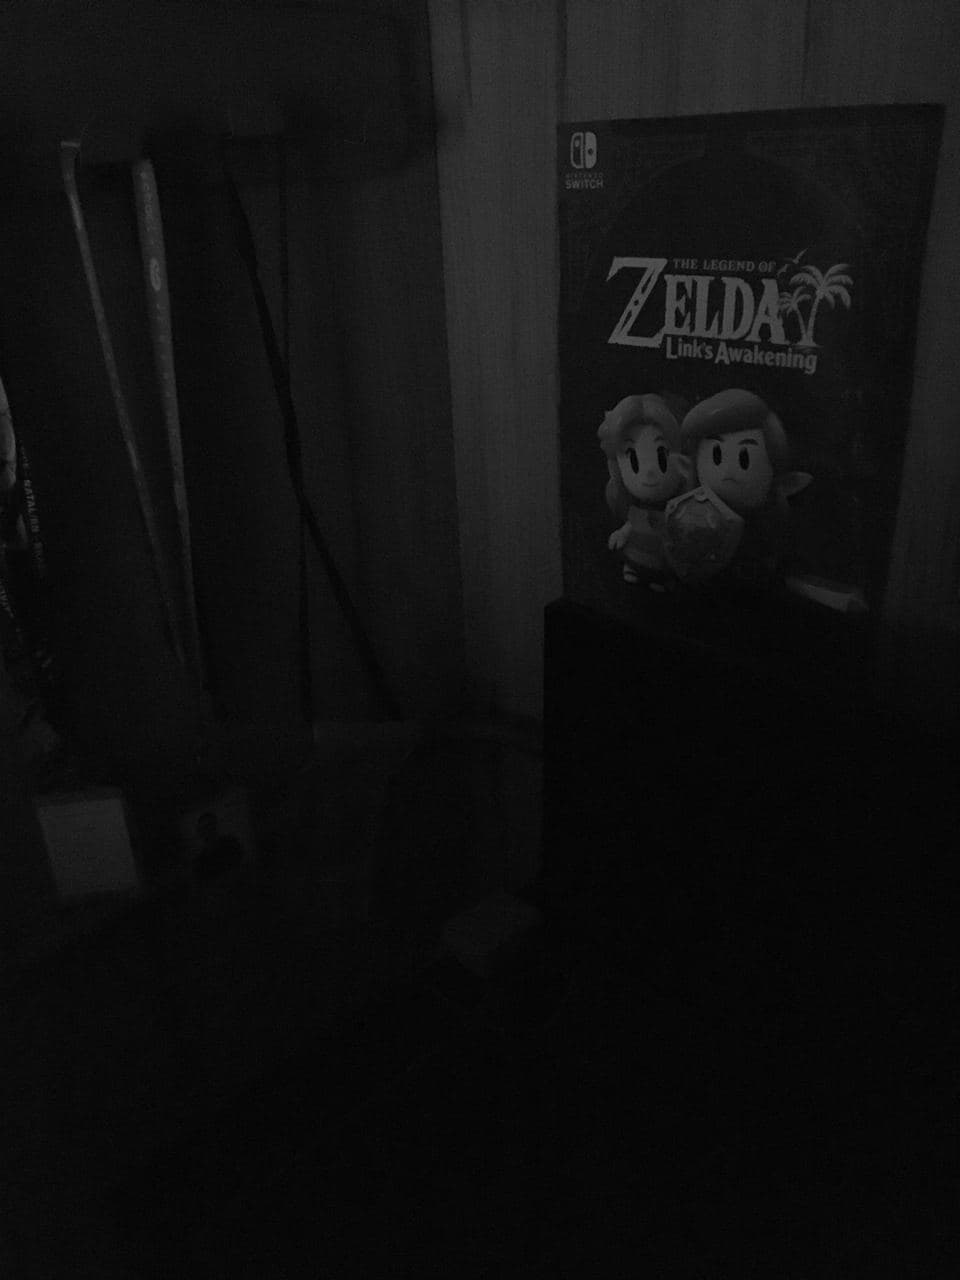

In [5]:
cv2_imshow(padded)

Definimos então a função do filtro no dominio do tempo ela é dada pela formula 

 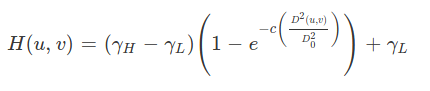


Com todos os parâmetros definimos abaixo

In [30]:
gammaL = 1.2
gammaH = 200
sharpC = 1
cutoff = 50000


Abaixo está o código utilizado para a função do filtro

In [9]:
def H(gamma_L, gamma_H,c,d_0,img):
      X,Y = img.shape
      
      u_c=X/2
      v_c=Y/2
      
      H=np.zeros(img.shape, dtype=np.float32)
      
      u,v = np.meshgrid(range(X),range(Y),indexing='ij')
      
      D_uv_2=np.power(np.power(u-u_c,2)+np.power(v-v_c,2),2)
      coef_exp = (-c)*D_uv_2/np.power(d_0,2)
      
      H = (gamma_H-gamma_L)*np.exp(coef_exp)+gamma_L
      return H

Podemos obter uma representação do filtro abaixo

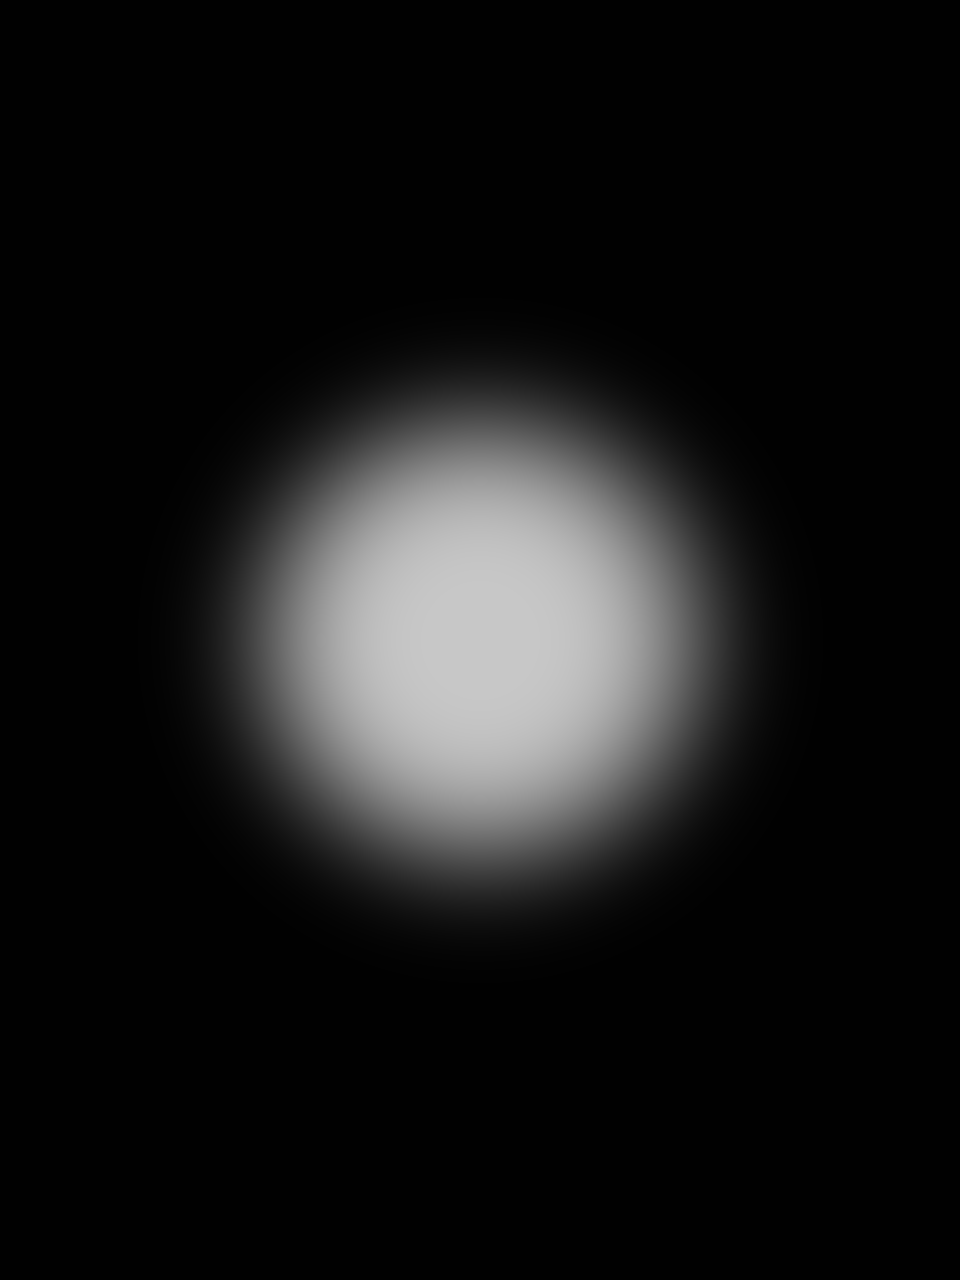

In [31]:
cv2_imshow(H(gammaL,gammaH,sharpC,cutoff,im))

Definimos então a função filtro que aplica a transformada de fourrier tanto na função do filtro quanto na imagem e realiza o produto entre as 2, após isso ele aplica a transformada inversa na imagem obtida e retorna ela para o usuario

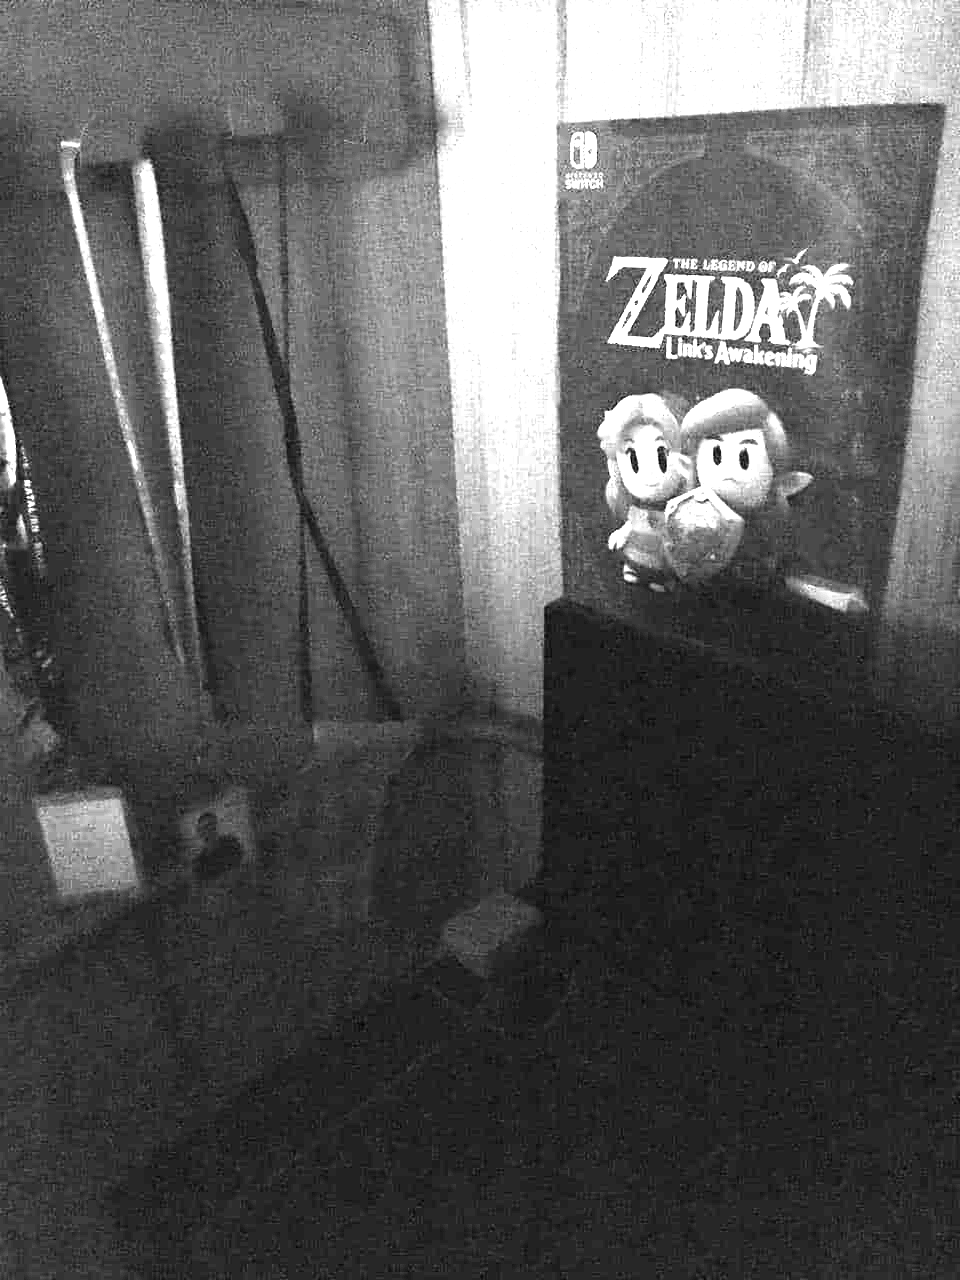

In [32]:
def filtro(img,gammaL,gammaH,sharpC,cutoff):

    trans_func = H(gammaL,gammaH,sharpC,cutoff,img)
    h = np.fft.fftshift(trans_func)
    
    im_log=np.log(1+img)
    
    f_img = np.fft.fft2(im_log)
    
    filt=f_img*h
    
    i_img = np.fft.ifft2(filt)
    
    i_exp = np.exp(np.real(i_img))-1
    
    i_int = i_exp.astype(int)
    
    return i_int

gammaL = 1.2
gammaH = 1.6
sharpC = 10
cutoff = 1

im_filtered=filtro(padded,gammaL,gammaH,sharpC,cutoff)
cv2_imshow(im_filtered)

# **Código Canny_point.py**

O objetivo deste código é criar um efeito de aquarela na imagem a partir do uso do filtro de detecção de bordas de Canny

para isso são definidas diferentes faixas de frequências do filtro e a cada frequência são desenhadas pequenos nos pontos onde existem contornos

o raio dessa esfera é variado a cada diferente faixa de coleta de forma que as bordas mais fortes da imagem possuem um raio ascentuado enquanto as mais fracas possuem um raio menor

abaixo temos um exemplo da utilização do filtro de Canny
na imagem abaixo

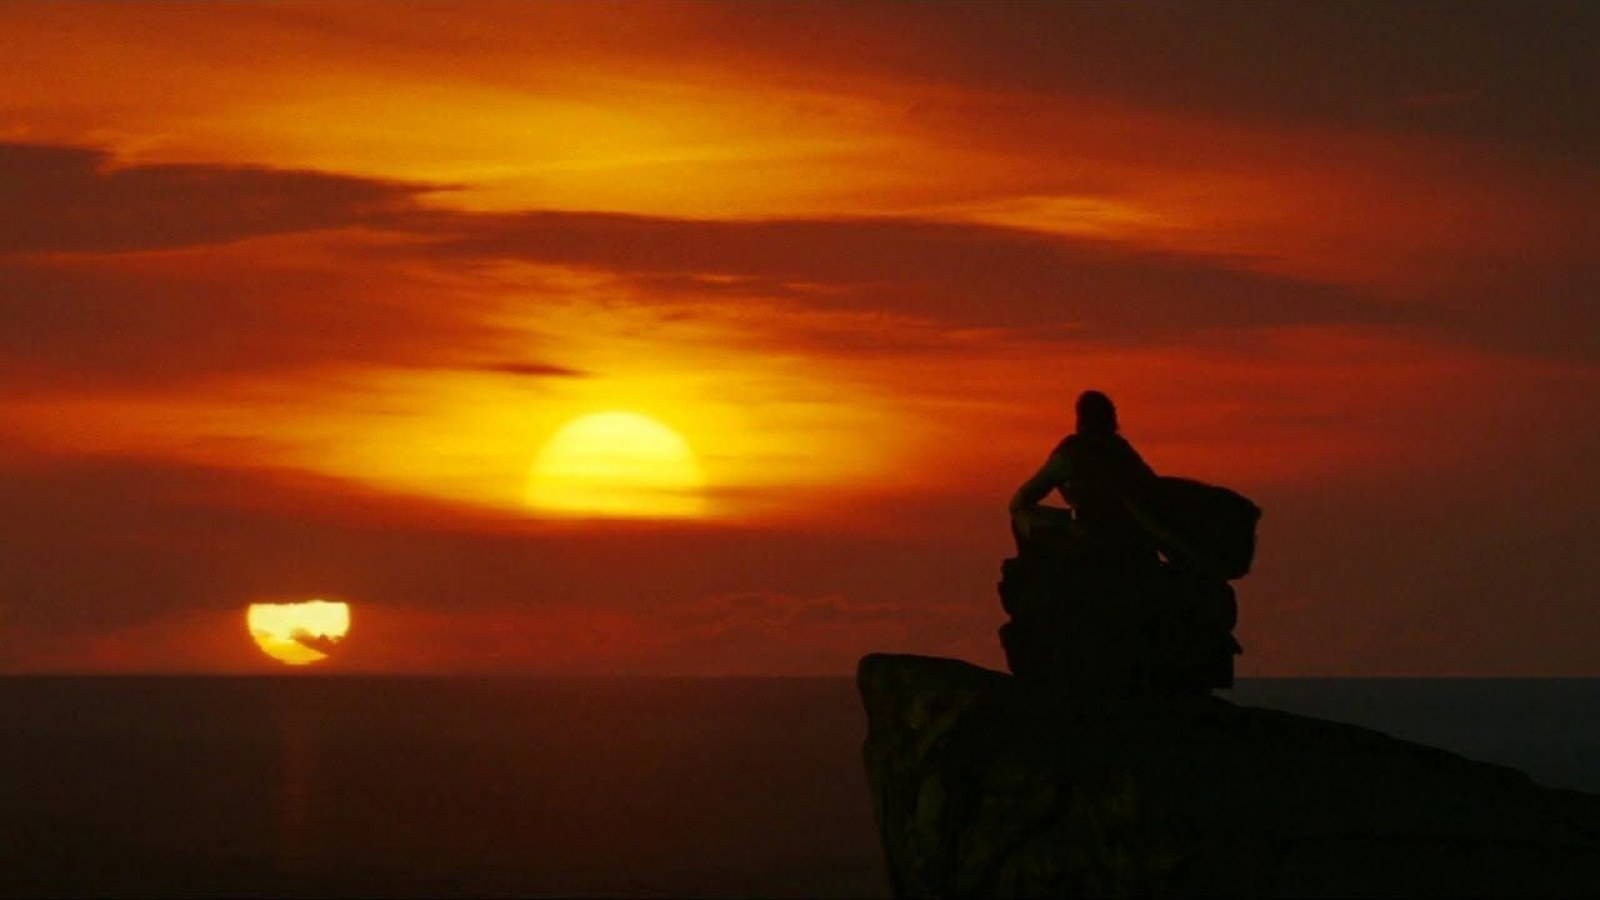

In [36]:
img=cv.imread("luke.jpg")
cv2_imshow(img)

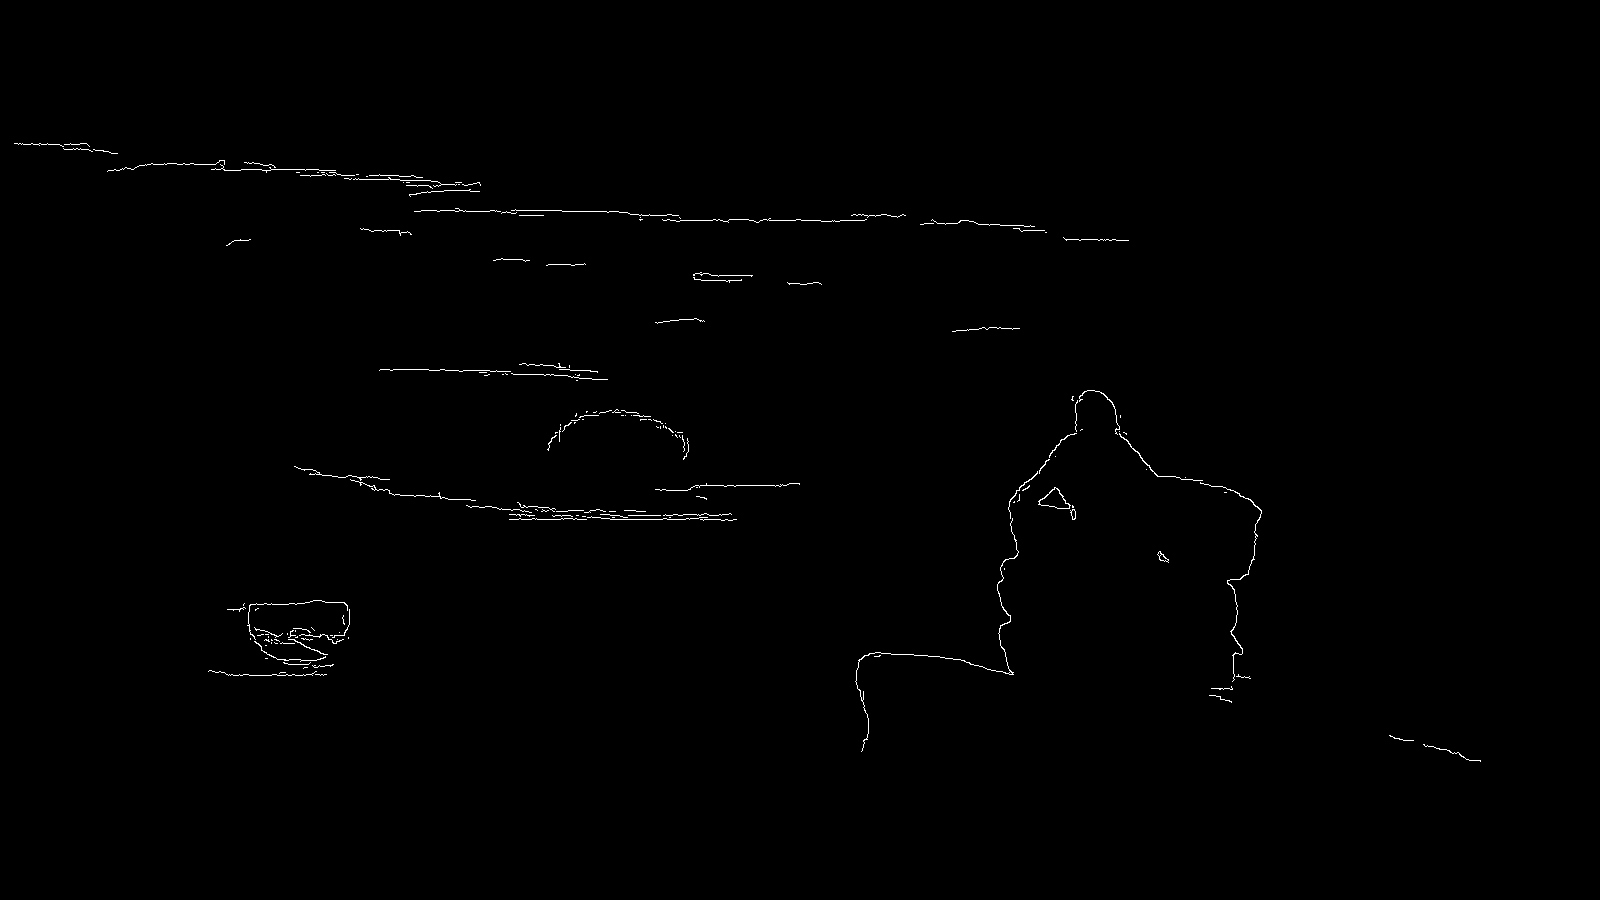

In [35]:
slider=40
slider_2=2*slider

img_canny=cv.Canny(img,slider,slider_2)
cv2_imshow(img_canny)

Abaixo está a implementação do código e os parametros utilizados para gerar o resultado esperado

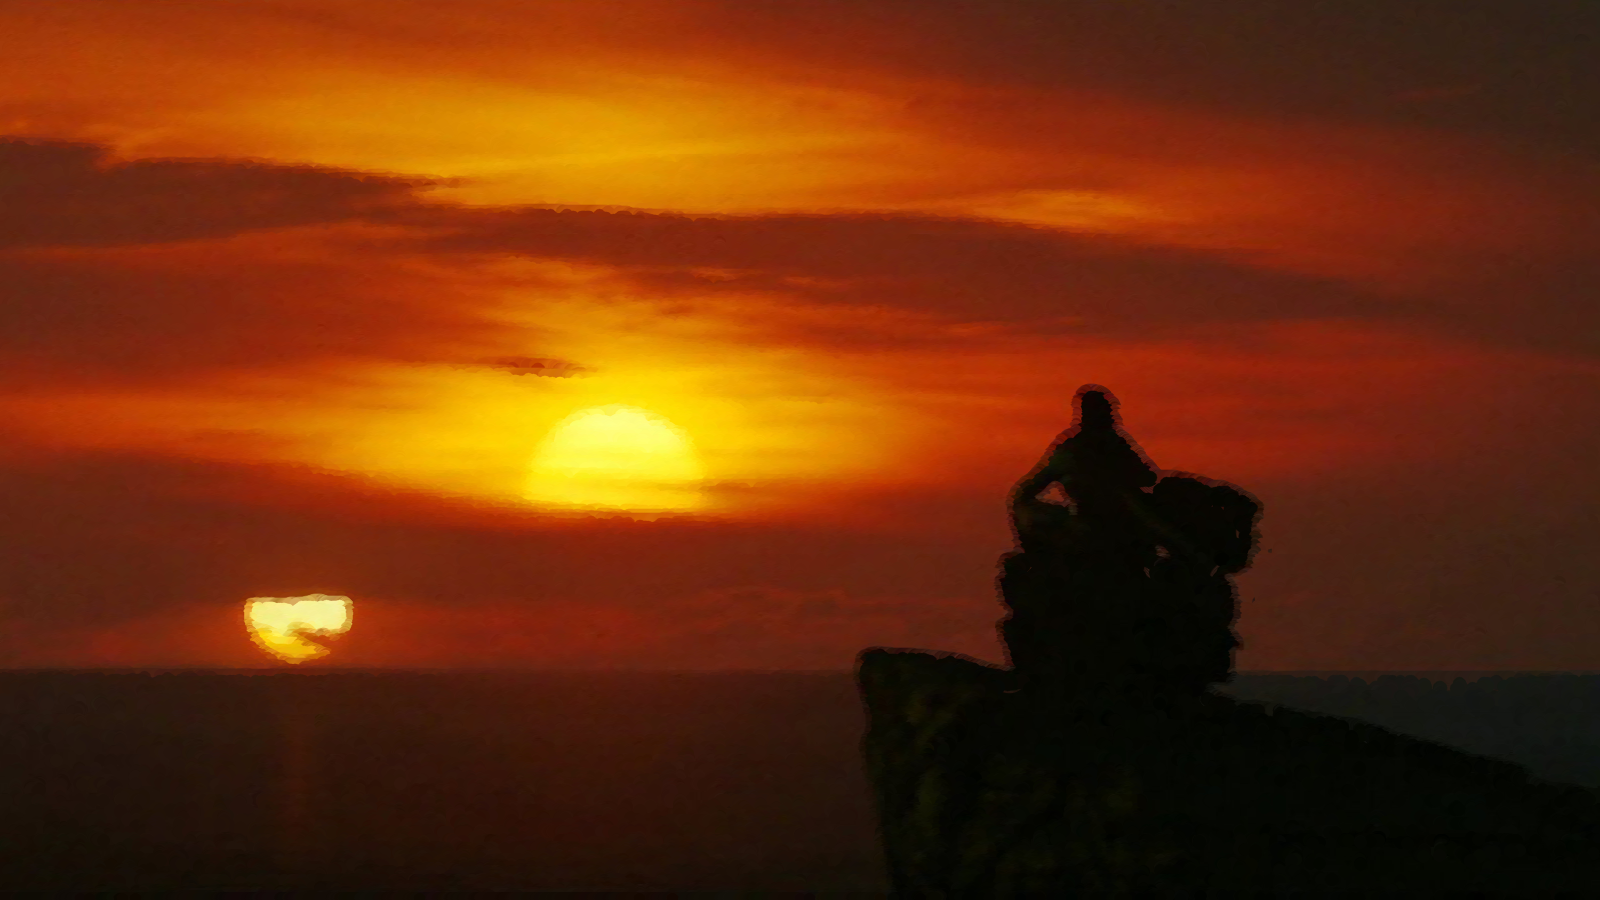

In [38]:
X,Y,Z = img.shape
img_copy = img.copy()
slider = [200,150,90,70,60,30,20,10]
slider_2=2*slider
RAIO=20
for l in range(len(slider)):
    img_canny=cv.Canny(img,slider[l],slider_2[l])
    for x in range(X):
        for y in range(Y):
            if img_canny[x,y]==255:
                c=(int(img[int(x),int(y),0]),int(img[int(x),int(y),1]),int(img[int(x),int(y),2]))
                img_ca=cv.circle(img_copy,(int(y),int(x)),RAIO,c,-1,cv.LINE_AA)
    RAIO-=2
    RAIO = int(RAIO)
cv2_imshow(img_ca)

# **Código KMeans.py**

O algortimo kmeans é um algoritmo de compressão de dados e redução de dimensionalidade. Nesta implementação o algoritmo k_means é aplicado em suscetivas rodadas para reduzir as cores da imagem em somente 8 cores 

Esse resultado é atingindo a partir das médias das cores presentes na imagem
o algoritmo é repetido 8 vezes cada vez é realizada uma repetição a mais do algoritmo kmeans com o objetivo de se conseguir uma melhor compressão de dados

abaixo está a imagem original seguida dos resultados do *algoritmo*

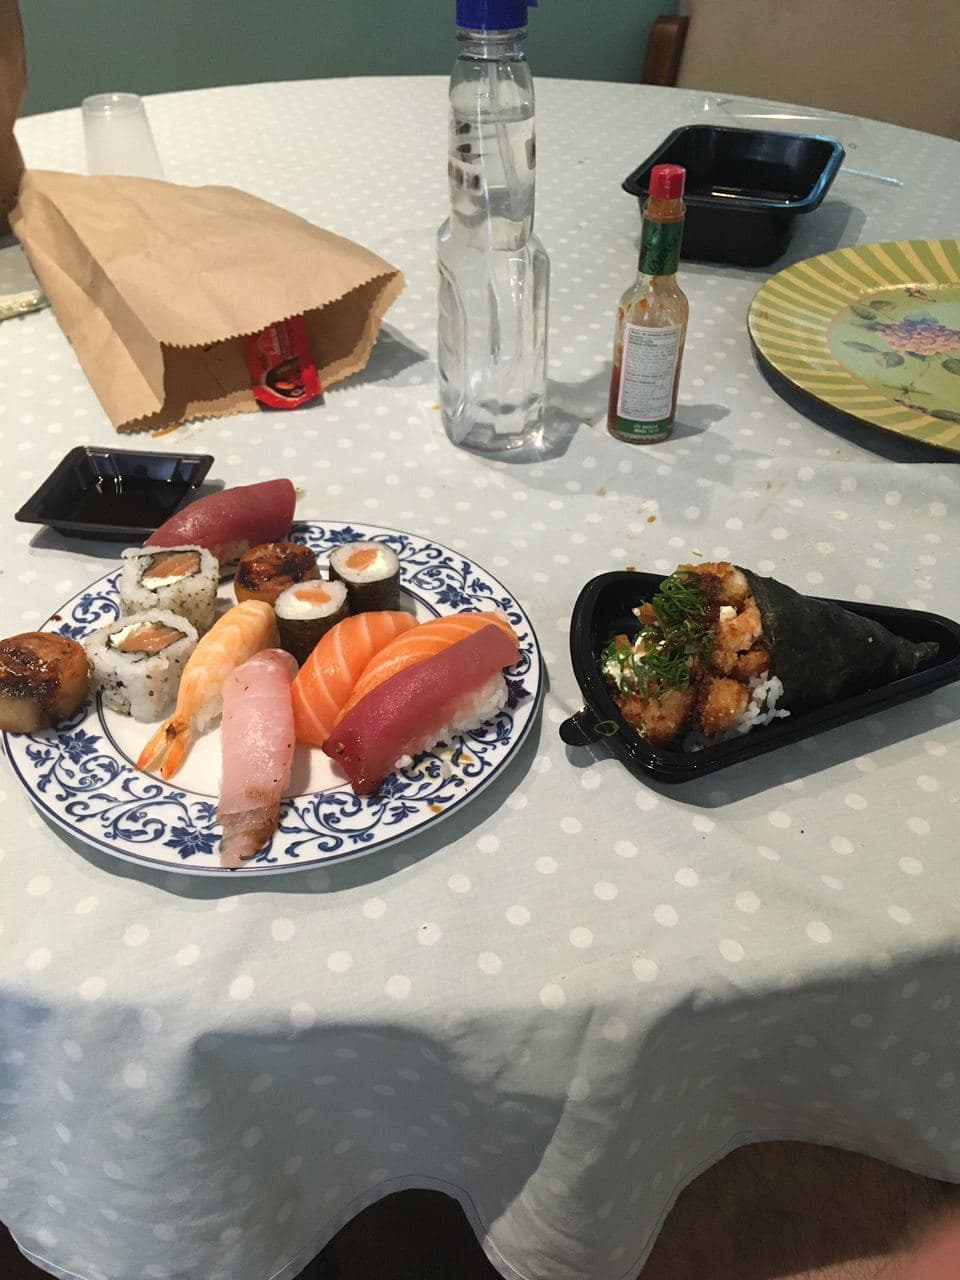

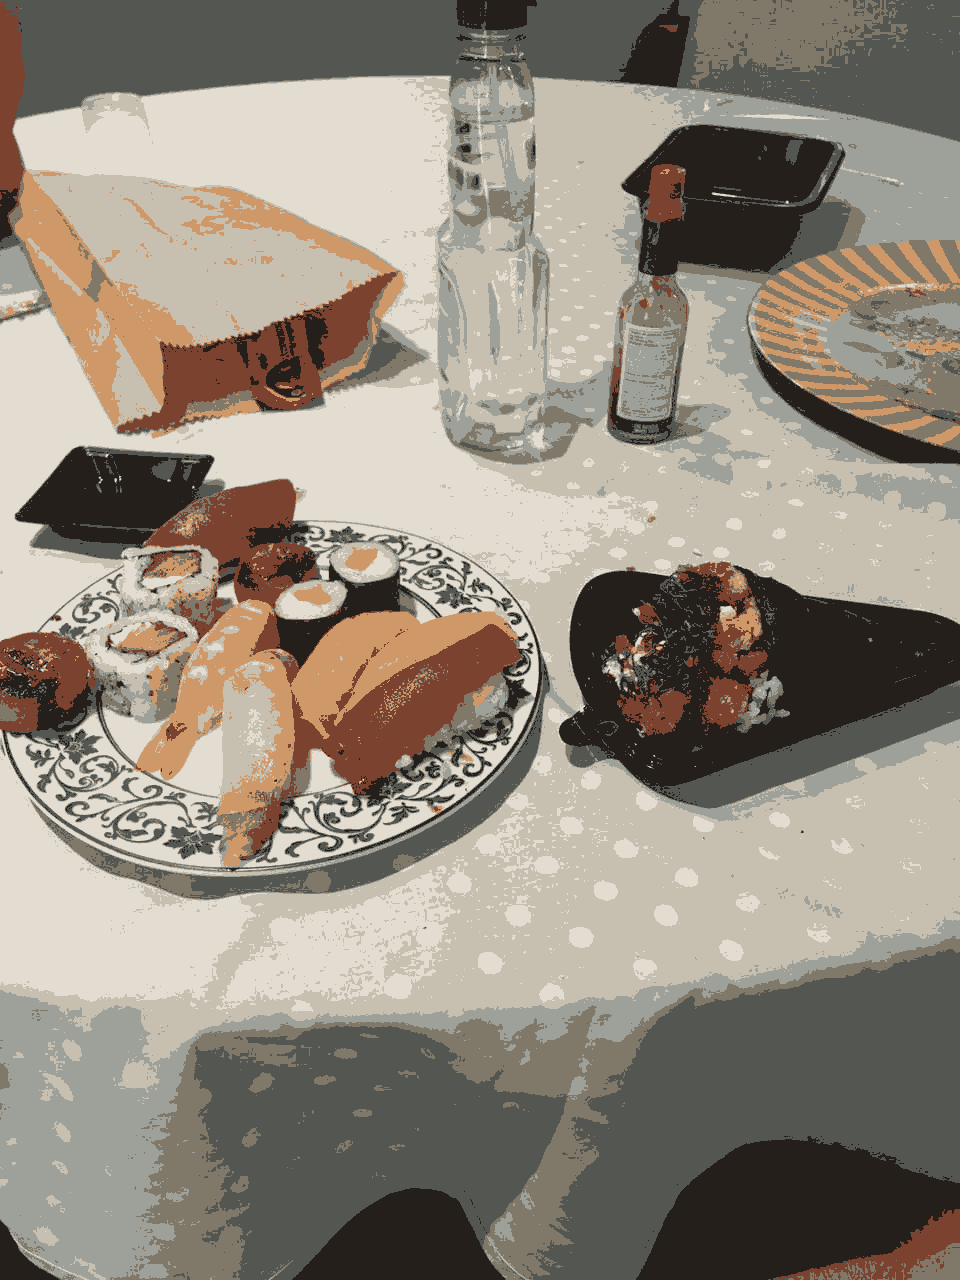

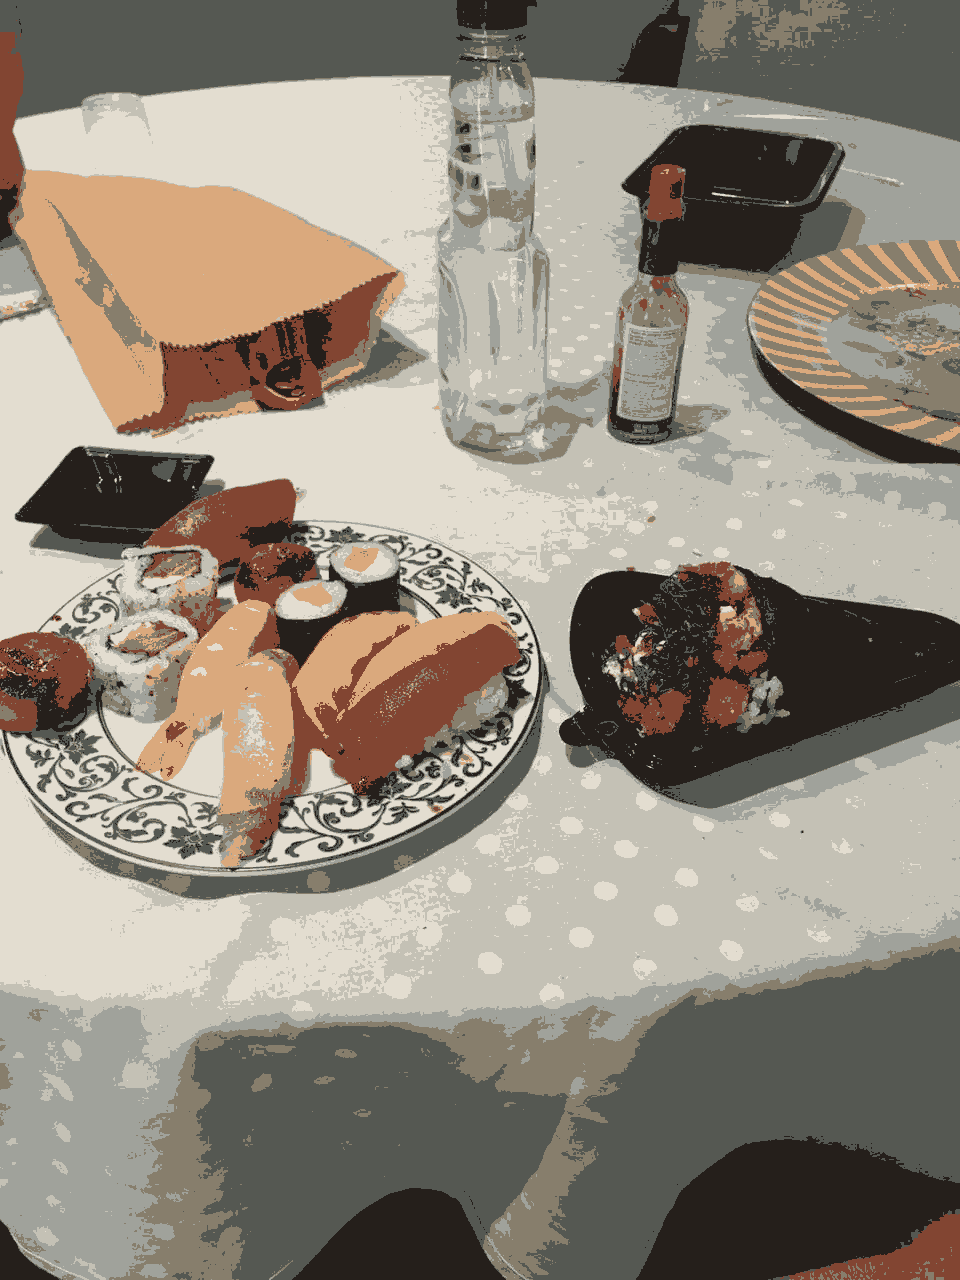

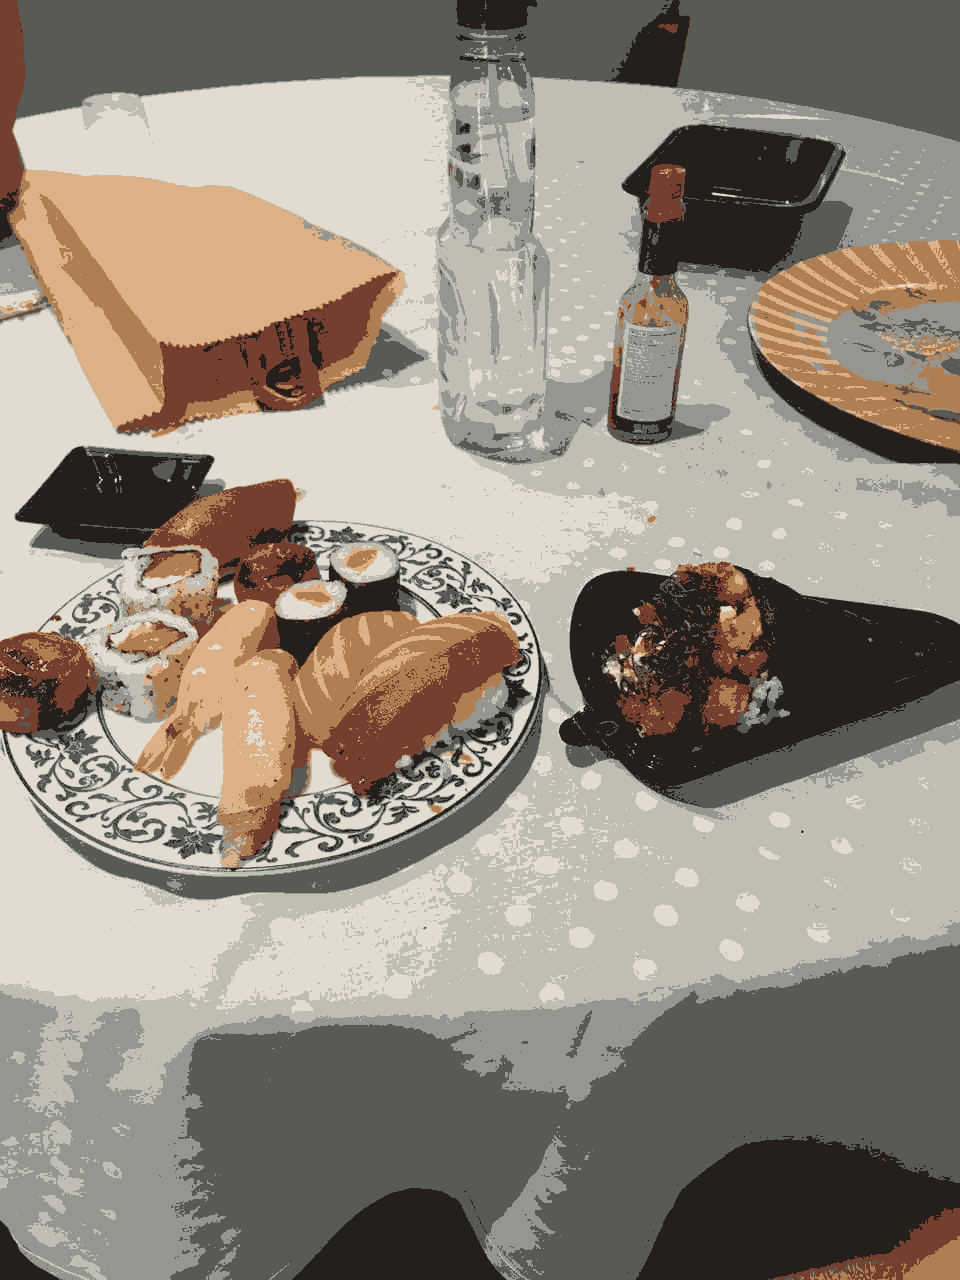

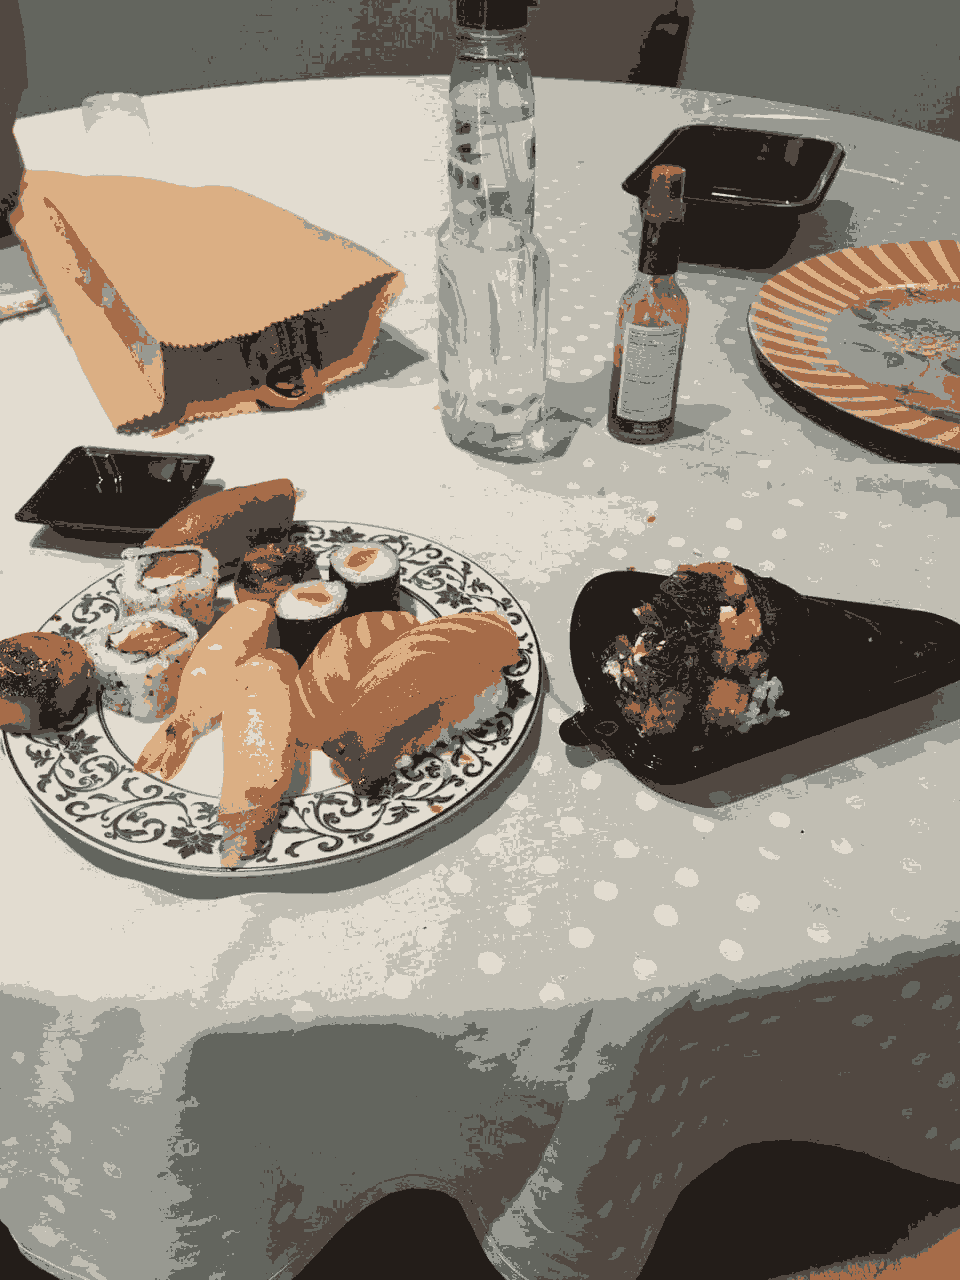

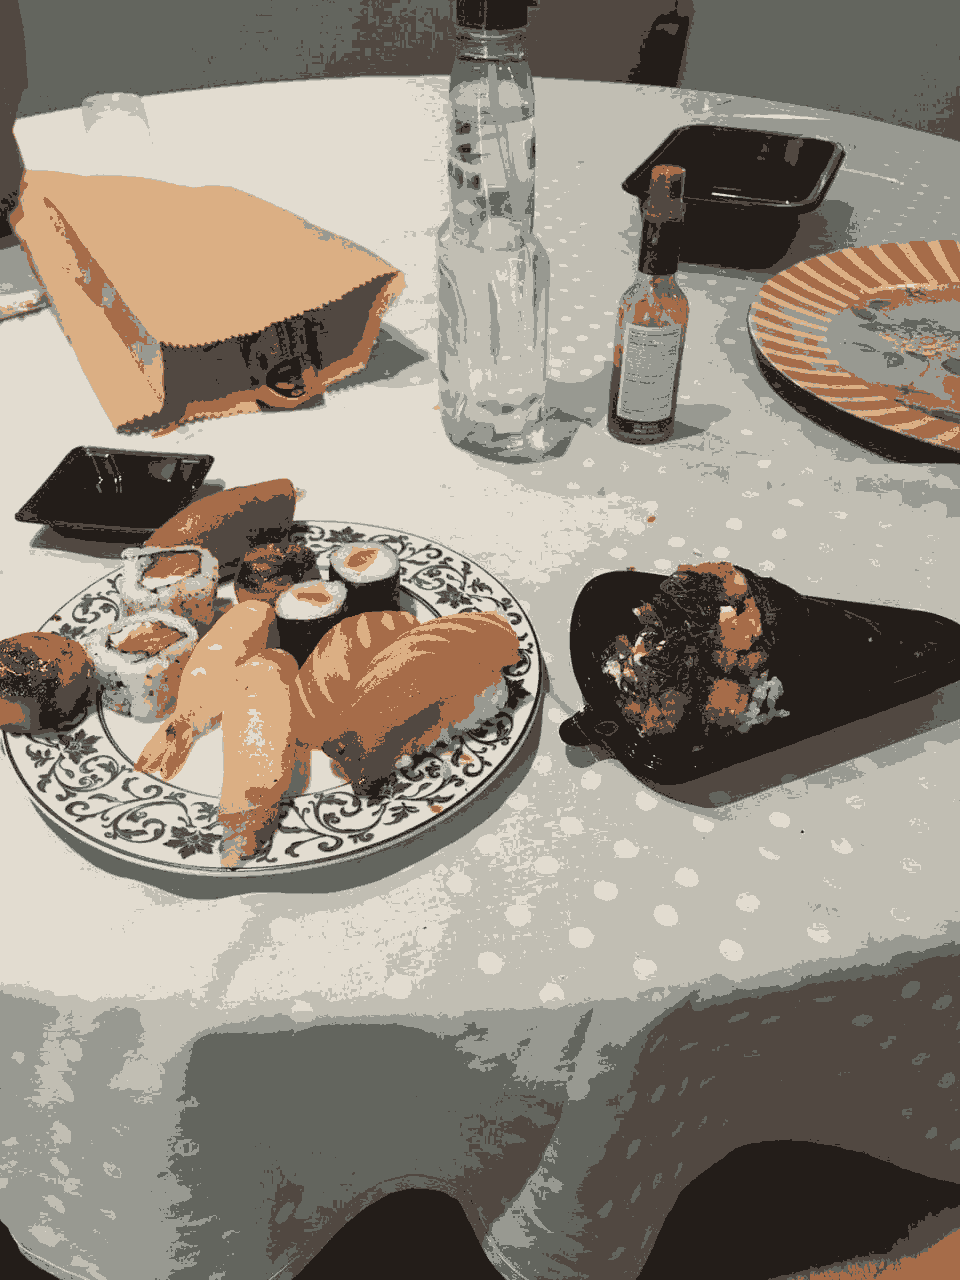

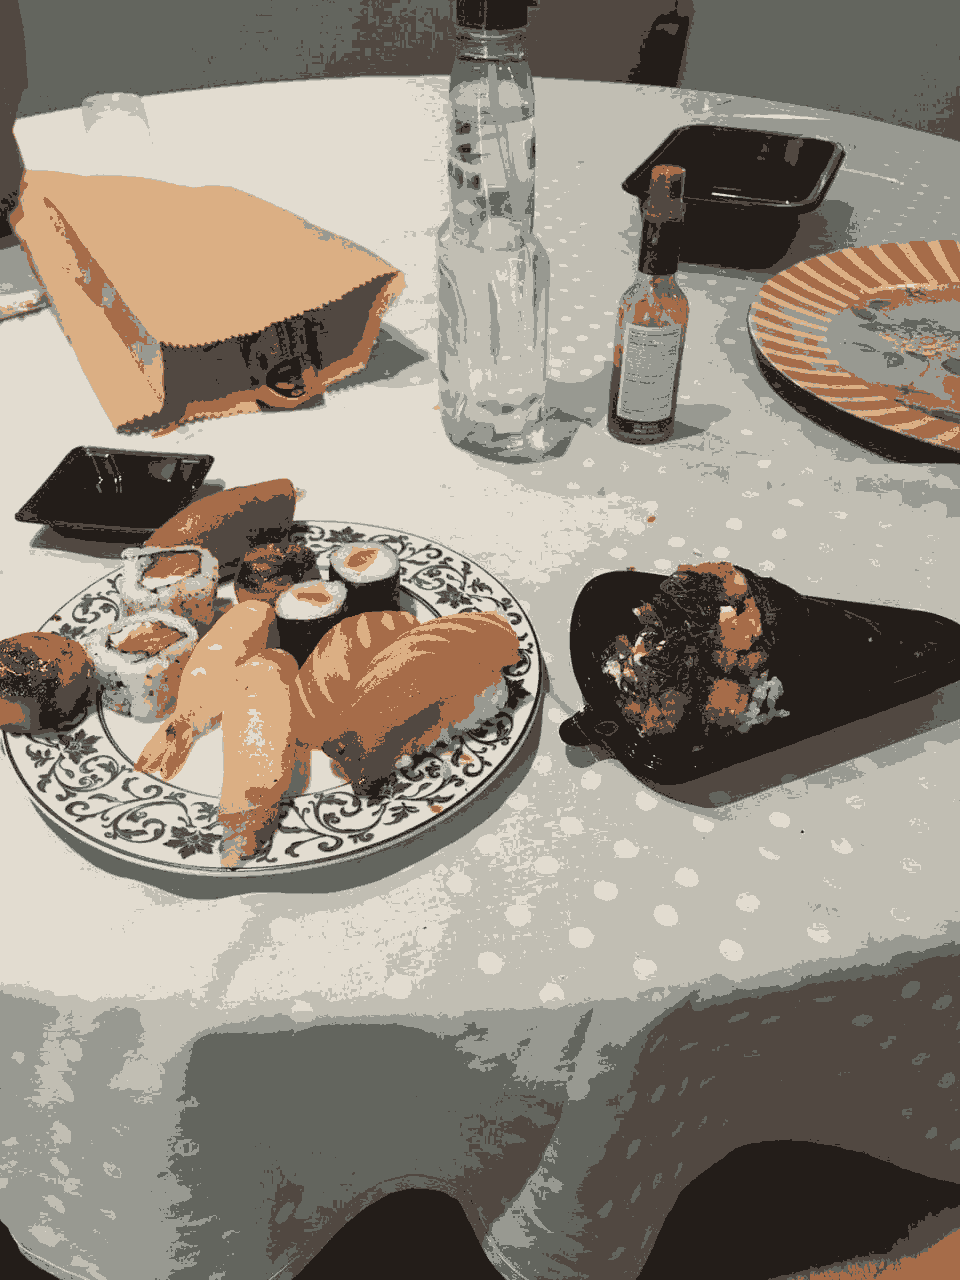

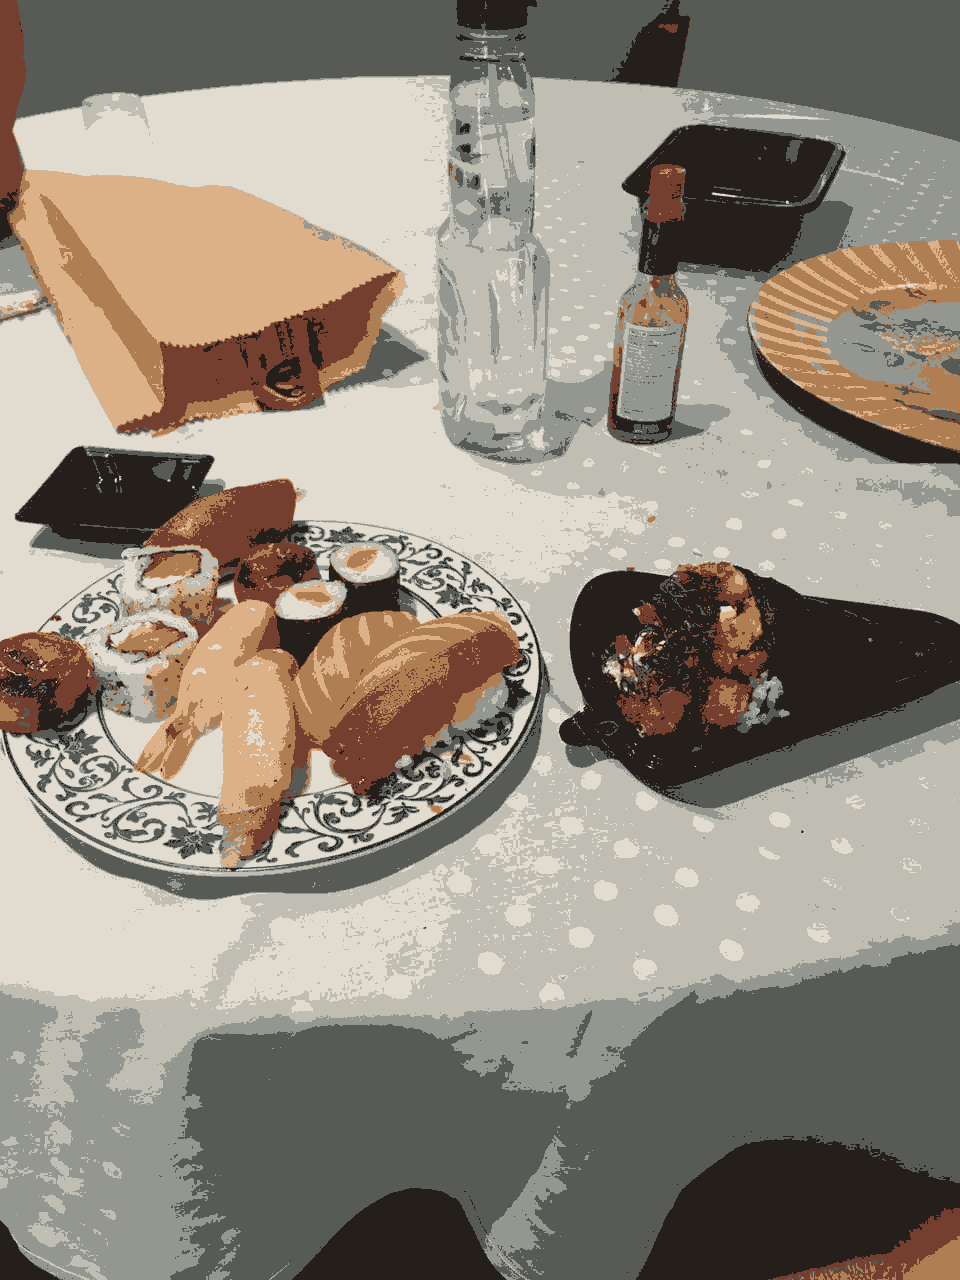

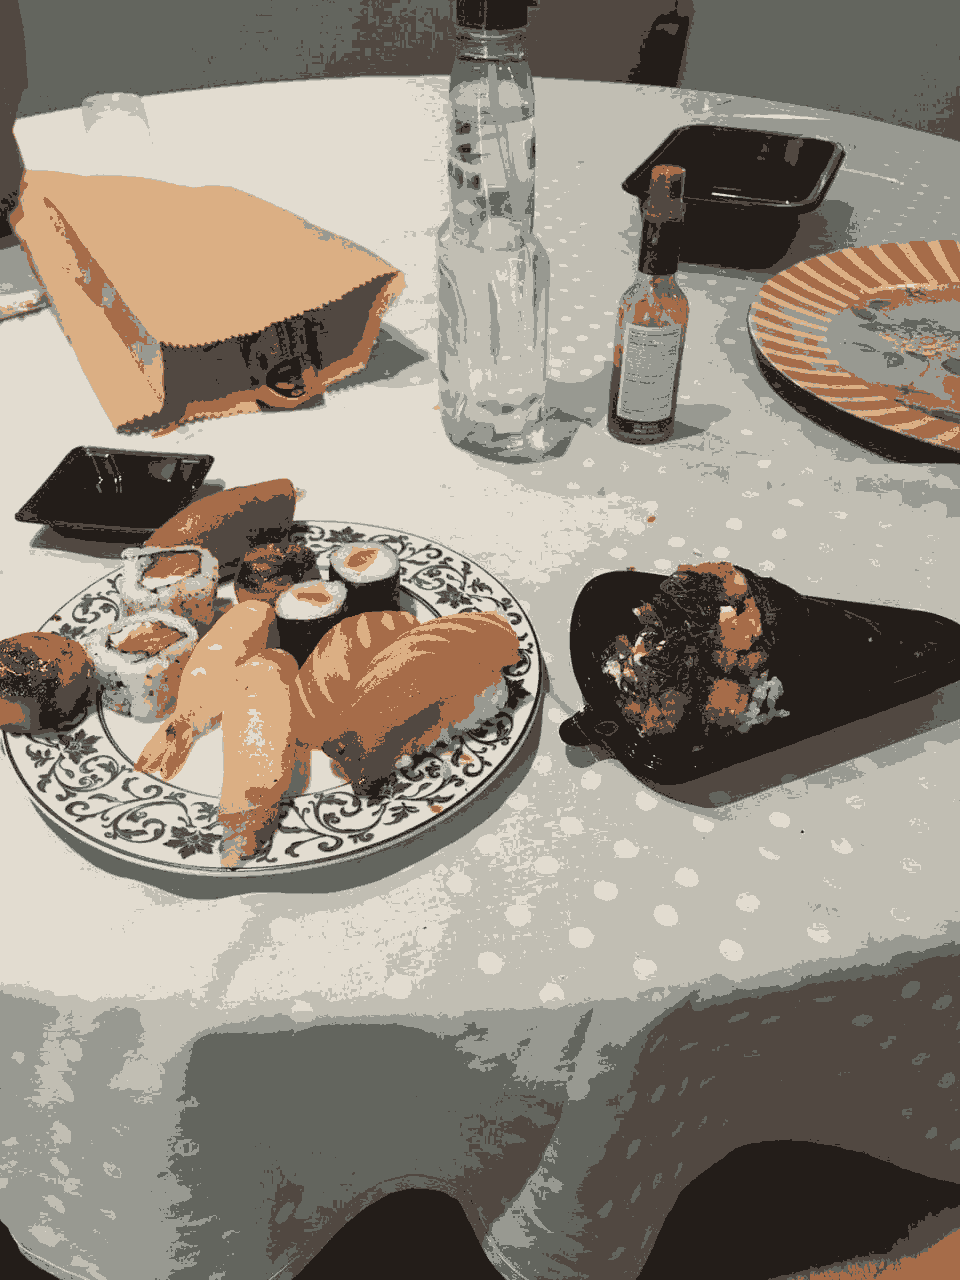

In [42]:
n_clusters = 8


term_crit = (cv.TERM_CRITERIA_COUNT |cv.TERM_CRITERIA_EPS, 10000, 0.0001)
img = cv.imread("sushi.jpg")
cv2_imshow(img)

for l in range(1,9):
    n_rodadas=l
    img_copy = img.reshape((-1,3))
    img_copy=np.float32(img_copy)
    
    X,Y,Z = img.shape
    
    ret,label,center=cv.kmeans(img_copy, n_clusters,None,term_crit,n_rodadas,cv.KMEANS_RANDOM_CENTERS)
    
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    cv2_imshow(res2)
